In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
from embryo_segmenting import *
from resnet_unet import *
from deeplabv3 import *

In [3]:
import torch.optim as optim
from torch.optim import lr_scheduler

In [4]:
data_dir = '../dataset'
image_datasets = {x: Dataset(os.path.join(data_dir, x), image_size=513, mask_size=65, is_deeplab=True)
                  for x in ['train', 'val']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=3, 
                                             shuffle=True, num_workers=4, drop_last=True)
              for x in ['train', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

num_class = 2

model = DeepLabV3(
        n_classes=num_class,
        n_blocks=[3, 4, 23, 3],
        atrous_rates=[6, 12, 18],
        multi_grids=[1, 2, 4],
        output_stride=8,
    ).to(device)

optimizer_ft = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=1e-4)

exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=10, gamma=0.1)        

cuda:0


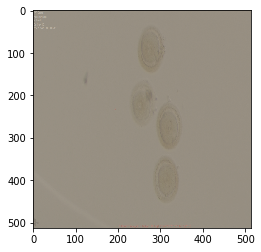

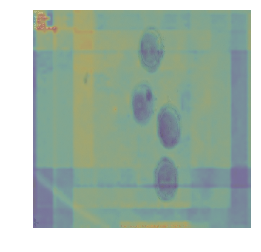

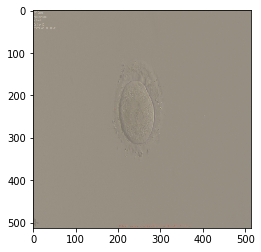

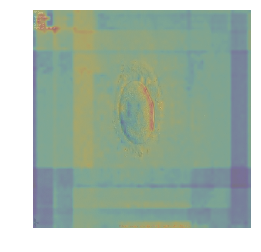

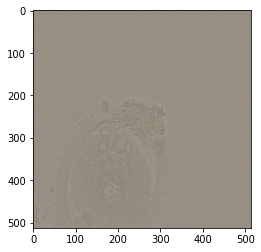

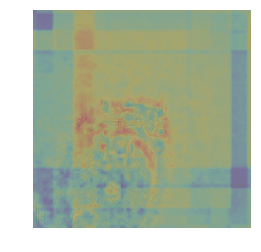

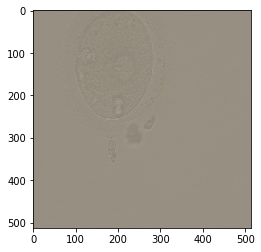

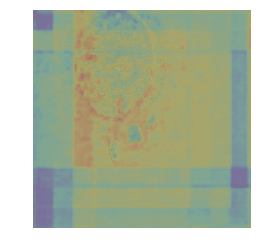

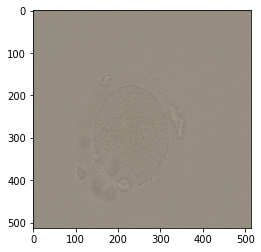

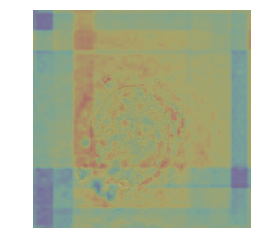

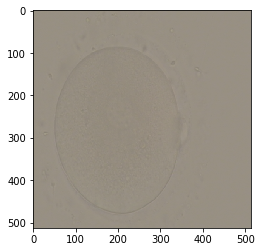

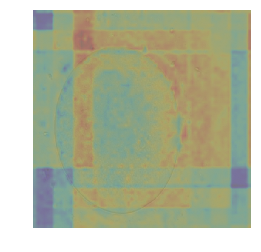

In [ ]:
visualize_segmenter(model, dataloaders['val'], device)

In [ ]:
model = train_model(model, optimizer_ft, exp_lr_scheduler, dataloaders, device, num_epochs=15)

Epoch 0/14
----------
LR 0.0001
train: iou: 0.657599, aed: 2.273603, bce: 0.363410, dice: 0.340922, loss: 0.352166
val: iou: 0.712691, aed: 0.432900, bce: 0.241534, dice: 0.288384, loss: 0.264959
saving best model
10m 56s
Epoch 1/14
----------
LR 0.0001
train: iou: 0.791117, aed: 0.421965, bce: 0.204220, dice: 0.229062, loss: 0.216641
val: iou: 0.787875, aed: 0.679654, bce: 0.198707, dice: 0.228045, loss: 0.213376
saving best model
10m 49s
Epoch 2/14
----------
LR 0.0001
train: iou: 0.842708, aed: 0.435453, bce: 0.134585, dice: 0.157034, loss: 0.145810
val: iou: 0.860400, aed: 0.359307, bce: 0.097113, dice: 0.119424, loss: 0.108269
saving best model
10m 44s
Epoch 3/14
----------
LR 0.0001
train: iou: 0.877000, aed: 0.383430, bce: 0.095320, dice: 0.108051, loss: 0.101685
val: iou: 0.873910, aed: 0.311688, bce: 0.081017, dice: 0.082664, loss: 0.081840
saving best model
10m 51s
Epoch 4/14
----------
LR 0.0001
train: iou: 0.883842, aed: 0.333333, bce: 0.082337, dice: 0.087280, loss: 0.0848

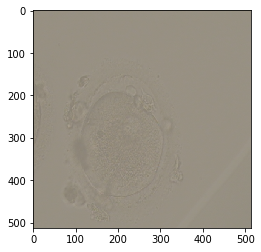

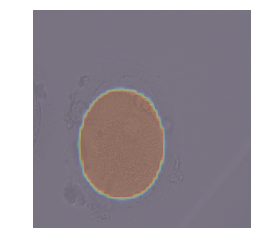

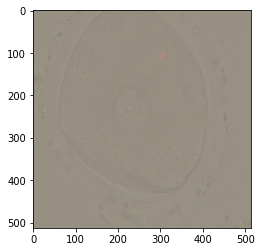

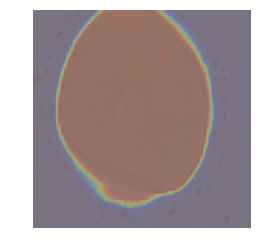

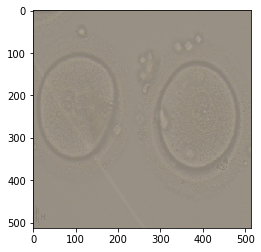

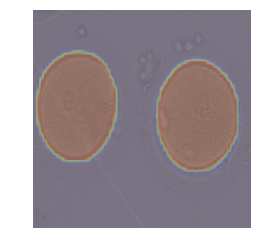

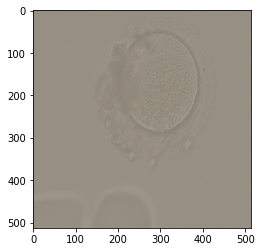

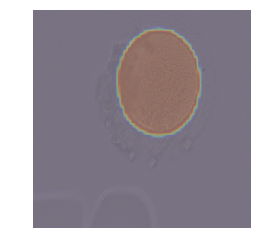

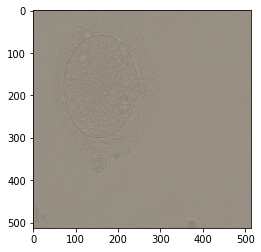

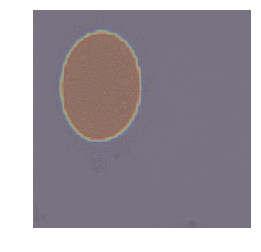

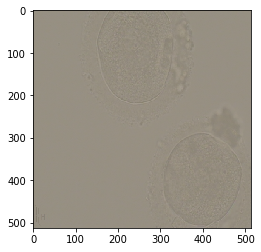

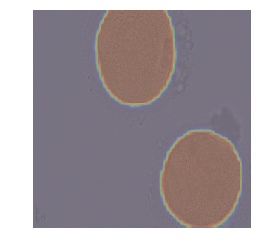

In [ ]:
visualize_segmenter(model, dataloaders['val'], device)

In [ ]:
results = score_segmenter(model, dataloaders, device)
print(results)

(0.9028790763613724, 0.19047619047619047)


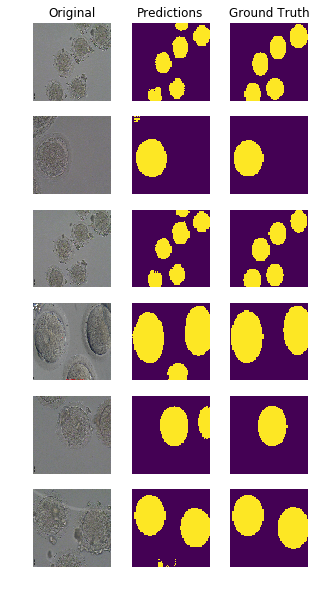

In [23]:
visualize_counting_errors(model, dataloaders['val'], device)